In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow.feature_column as fc

import os
import sys

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
tf.enable_eager_execution()

In [3]:
! pip install requests

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
models_path = os.path.join(os.getcwd(), 'models')
sys.path.append(models_path)

In [5]:
from official.wide_deep import census_dataset
from official.wide_deep import census_main

census_dataset.download("/tmp/census_data/")

W0725 08:33:50.089238 140427323885376 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_dataset.py:78: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

W0725 08:33:50.090740 140427323885376 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_dataset.py:81: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

W0725 08:37:24.219202 140427323885376 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_dataset.py:62: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

W0725 08:37:24.549461 140427323885376 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_dataset.py:73: The name tf.gfile.Remove is deprecated. Please use tf.io.gfile.remove instead.



In [6]:
if "PYTHONPATH" in os.environ:
  os.environ['PYTHONPATH'] += os.pathsep +  models_path
else:
  os.environ['PYTHONPATH'] = models_path

In [9]:
!python -m official.wide_deep.census_main --help

W0725 08:40:17.243052 140126278432576 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_main.py:114: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0725 08:40:17.243367 140126278432576 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_main.py:114: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.

Train DNN on census income dataset.
flags:

/tf/notebooks/tf_official/estimators/models/official/wide_deep/census_main.py:
  -bs,--batch_size:
    Batch size for training and evaluation. When using multiple gpus, this is
    the
    global batch size for all devices. For example, if the batch size is 32 and
    there are 4 GPUs, each GPU will get 8 examples on each step.
    (default: '40')
    (an integer)
  --[no]clean:
    If set, model_dir will be removed if it exists.
    (default: 'false')

In [10]:
!python -m official.wide_deep.census_main --model_type=wide --train_epochs=2

W0725 08:41:23.016214 140510523660096 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_main.py:114: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0725 08:41:23.016488 140510523660096 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_main.py:114: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.

W0725 08:41:23.020954 140510523660096 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_dataset.py:78: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

W0725 08:41:23.021172 140510523660096 deprecation_wrapper.py:119] From /tf/notebooks/tf_official/estimators/models/official/wide_deep/census_dataset.py:81: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

W0725 08:41:23.022311 14

I0725 08:41:29.788779 140510523660096 basic_session_run_hooks.py:692] global_step/sec: 324.217
I0725 08:41:29.789570 140510523660096 basic_session_run_hooks.py:260] average_loss = 0.32871822, loss = 13.148728 (0.309 sec)
I0725 08:41:29.789878 140510523660096 basic_session_run_hooks.py:260] loss = 13.148728, step = 501 (0.309 sec)
I0725 08:41:30.106144 140510523660096 basic_session_run_hooks.py:692] global_step/sec: 315.099
I0725 08:41:30.106930 140510523660096 basic_session_run_hooks.py:260] average_loss = 0.33019137, loss = 13.207655 (0.317 sec)
I0725 08:41:30.107261 140510523660096 basic_session_run_hooks.py:260] loss = 13.207655, step = 601 (0.317 sec)
I0725 08:41:30.416978 140510523660096 basic_session_run_hooks.py:692] global_step/sec: 321.708
I0725 08:41:30.417694 140510523660096 basic_session_run_hooks.py:260] average_loss = 0.40893573, loss = 16.35743 (0.311 sec)
I0725 08:41:30.417929 140510523660096 basic_session_run_hooks.py:260] loss = 16.35743, step = 701 (0.311 sec)
I0725 

In [11]:
!ls /tmp/census_data/

adult.data  adult.test


In [12]:
train_file = "/tmp/census_data/adult.data"
test_file = "/tmp/census_data/adult.test"

In [96]:
import pandas

train_df = pandas.read_csv(train_file, header=None, names=census_dataset._CSV_COLUMNS)
test_df = pandas.read_csv(test_file, header=None, names=census_dataset._CSV_COLUMNS)
census_dataset._CSV_COLUMNS

print(train_df.columns.size)
print(train_df.index.size)
train_df.head()
set(train_df['occupation'])

15
32561


{'?',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving'}

In [42]:
def easy_input_function(df, label_key, num_epochs, shuffle, batch_size):
    label = df[label_key]
    ds = tf.data.Dataset.from_tensor_slices((dict(df),label))
    
    if shuffle:
        ds = ds.shuffle(10000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    return ds

In [67]:
ds = easy_input_function(train_df, label_key='income_bracket',
                        num_epochs=5,shuffle=True, batch_size=10)

for feature_batch,label_batch in ds.take(1):
    print('some feature keys:', list(feature_batch.keys()))
    print()
    print('A batch of Age:', feature_batch['age'])
    print()
    print('A batch of Label:', label_batch)



some feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_bracket']

A batch of Age: tf.Tensor([57 23 51 44 29 49 24 24 24 34], shape=(10,), dtype=int32)

A batch of Label: tf.Tensor(
[b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'>50K' b'<=50K' b'<=50K'
 b'<=50K' b'>50K'], shape=(10,), dtype=string)


In [68]:
import inspect
print(inspect.getsource(census_dataset.input_fn))

def input_fn(data_file, num_epochs, shuffle, batch_size):
  """Generate an input function for the Estimator."""
  assert tf.gfile.Exists(data_file), (
      '%s not found. Please make sure you have run census_dataset.py and '
      'set the --data_dir argument to the correct path.' % data_file)

  def parse_csv(value):
    tf.logging.info('Parsing {}'.format(data_file))
    columns = tf.decode_csv(value, record_defaults=_CSV_COLUMN_DEFAULTS)
    features = dict(zip(_CSV_COLUMNS, columns))
    labels = features.pop('income_bracket')
    classes = tf.equal(labels, '>50K')  # binary classification
    return features, classes

  # Extract lines from input files using the Dataset API.
  dataset = tf.data.TextLineDataset(data_file)

  if shuffle:
    dataset = dataset.shuffle(buffer_size=_NUM_EXAMPLES['train'])

  dataset = dataset.map(parse_csv, num_parallel_calls=5)

  # We call repeat after shuffling, rather than before, to prevent separate
  # epochs from blending together.
  dataset = 

In [72]:
ds = census_dataset.input_fn(train_file, num_epochs=5, shuffle=True, batch_size=10)

for feature_batch, label_batch in ds.take(1):
    print('Feature keys:', list(feature_batch.keys())[:5])
    print()
    print('Age batch:', feature_batch['age'])
    print()
    print('Label batch:', label_batch)

Feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

Age batch: tf.Tensor([67 18 30 35 20 42 38 48 29 49], shape=(10,), dtype=int32)

Label batch: tf.Tensor([False False False False False False  True False False False], shape=(10,), dtype=bool)


In [88]:
import functools

train_inpf = functools.partial(census_dataset.input_fn, train_file,
                              num_epochs=2, shuffle=True, batch_size=64)
test_inpf = functools.partial(census_dataset.input_fn, test_file,
                              num_epochs=1, shuffle=True, batch_size=64)
train_inpf
census_dataset.input_fn

<function official.wide_deep.census_dataset.input_fn(data_file, num_epochs, shuffle, batch_size)>

In [73]:
age = fc.numeric_column('age')
age

NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [74]:
fc.input_layer(feature_batch,[age]).numpy()

W0726 03:07:16.695712 140427323885376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:205: NumericColumn._get_dense_tensor (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0726 03:07:16.697372 140427323885376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:2115: NumericColumn._transform_feature (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0726 03:07:16.699953 140427323885376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_c

array([[67.],
       [18.],
       [30.],
       [35.],
       [20.],
       [42.],
       [38.],
       [48.],
       [29.],
       [49.]], dtype=float32)

In [81]:
classifier = tf.estimator.LinearClassifier(feature_columns=[age])
classifier.train(train_inpf)
result= classifier.evaluate(test_inpf)
clear_output()
print(result)

{'accuracy': 0.76377374, 'accuracy_baseline': 0.76377374, 'auc': 0.6780343, 'auc_precision_recall': 0.3112702, 'average_loss': 0.5260417, 'label/mean': 0.23622628, 'loss': 33.586212, 'precision': 0.0, 'prediction/mean': 0.21324953, 'recall': 0.0, 'global_step': 1018}


In [83]:
education_num = tf.feature_column.numeric_column('education_num')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss= tf.feature_column.numeric_column('capital_loss')
hours_per_week= tf.feature_column.numeric_column('hours_per_week')

my_numeric_columns = [age, education_num, capital_gain, \
                      capital_loss, hours_per_week]

fc.input_layer(feature_batch,my_numeric_columns).numpy()

array([[6.700e+01, 0.000e+00, 0.000e+00, 1.000e+01, 4.000e+01],
       [1.800e+01, 0.000e+00, 0.000e+00, 6.000e+00, 2.500e+01],
       [3.000e+01, 0.000e+00, 0.000e+00, 9.000e+00, 4.000e+01],
       [3.500e+01, 0.000e+00, 0.000e+00, 1.000e+01, 3.500e+01],
       [2.000e+01, 0.000e+00, 0.000e+00, 1.000e+01, 1.500e+01],
       [4.200e+01, 0.000e+00, 0.000e+00, 1.400e+01, 3.800e+01],
       [3.800e+01, 7.688e+03, 0.000e+00, 1.600e+01, 4.000e+01],
       [4.800e+01, 0.000e+00, 0.000e+00, 1.000e+01, 4.400e+01],
       [2.900e+01, 0.000e+00, 0.000e+00, 1.500e+01, 5.500e+01],
       [4.900e+01, 0.000e+00, 0.000e+00, 9.000e+00, 4.000e+01]],
      dtype=float32)

In [87]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns)
classifier.train(train_inpf)

result = classifier.evaluate(test_inpf)

for key, value in sorted(result.items()):
    print('%s:%s'% (key,value))

W0726 03:41:49.784833 140427323885376 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp2yn3zoia
W0726 03:41:56.426391 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0726 03:41:56.454896 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


accuracy:0.7826301
accuracy_baseline:0.76377374
auc:0.71703655
auc_precision_recall:0.51337904
average_loss:1.2810885
global_step:1018
label/mean:0.23622628
loss:81.79373
precision:0.61619985
prediction/mean:0.24470079
recall:0.21164846


In [95]:

relationship = fc.categorical_column_with_vocabulary_list(
    'relationship',
    ['Husband',
     'Not-in-family',
     'Other-relative',
     'Own-child',
     'Unmarried',
     'Wife'])
relationship 
#fc.indicator_column(relationship)

VocabularyListCategoricalColumn(key='relationship', vocabulary_list=('Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [104]:
result = fc.input_layer(feature_batch, 
               [age, fc.indicator_column(relationship)])
result.numpy().shape

(10, 7)

In [98]:
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    'occupation',hash_bucket_size=1000)


In [119]:
for item in feature_batch['occupation'].numpy():
    print(item.decode())

occupation_result = fc.input_layer(feature_batch, [fc.indicator_column(occupation)])
print(occupation_result.numpy().shape)
tf.argmax(occupation_result, axis=1).numpy()

Sales
Other-service
Machine-op-inspct
Sales
Other-service
Prof-specialty
Prof-specialty
Adm-clerical
Prof-specialty
Craft-repair
(10, 1000)


array([631, 527, 911, 631, 527, 979, 979,  96, 979, 466])

In [123]:
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education',[
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'
    ])
marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status', [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed']
)
workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass', [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked']
)

my_categorical_columns=[relationship, occupation,education,marital_status,workclass]


[VocabularyListCategoricalColumn(key='relationship', vocabulary_list=('Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 HashedCategoricalColumn(key='occupation', hash_bucket_size=1000, dtype=tf.string),
 VocabularyListCategoricalColumn(key='education', vocabulary_list=('Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='marital_status', vocabulary_list=('Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='workclass', vocabulary_list=('Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov', 'Local-gov', '?', 'Self-emp-i

In [128]:
classifier = tf.estimator.LinearClassifier(
    feature_columns=my_numeric_columns+my_categorical_columns)

classifier.train(train_inpf)
result=classifier.evaluate(test_inpf)

for key,value in sorted(result.items()):
    print('%s: %s' % (key, value))

W0729 07:48:35.360901 140427323885376 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp2f1natuy
W0729 07:48:45.571618 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0729 07:48:45.599172 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


accuracy: 0.8227382
accuracy_baseline: 0.76377374
auc: 0.871115
auc_precision_recall: 0.65376365
average_loss: 1.3506603
global_step: 1018
label/mean: 0.23622628
loss: 86.235695
precision: 0.6372213
prediction/mean: 0.24345823
recall: 0.5795632


In [131]:
age_buckets = tf.feature_column.bucketized_column(
    age,boundaries=[18,25,30,35,40,45,50,55,60,65 ])
age_buckets

BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(18, 25, 30, 35, 40, 45, 50, 55, 60, 65))

In [130]:
fc.input_layer(feature_batch, [age, age_buckets]).numpy()

W0729 09:11:08.706440 140427323885376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:205: BucketizedColumn._get_dense_tensor (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0729 09:11:08.707464 140427323885376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:2115: BucketizedColumn._transform_feature (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0729 09:11:08.709081 140427323885376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/fea

array([[67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [18.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [30.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [35.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [20.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [42.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [38.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [48.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [29.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [49.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]],
      dtype=float32)

In [132]:
education_x_occupation = tf.feature_column.crossed_column(
    ['education', 'occupation'], hash_bucket_size = 1000)
education_x_occupation 

CrossedColumn(keys=('education', 'occupation'), hash_bucket_size=1000, hash_key=None)

In [133]:
age_buckets_x_education_x_occupation=tf.feature_column.crossed_column(
    [age_buckets,'education','occupation'],hash_bucket_size=1000)

In [140]:
import tempfile

base_columns = [
    education,marital_status,relationship,workclass, occupation,
    age_buckets,
]
crossed_columns = [
    tf.feature_column.crossed_column(
    ['education','occupation'],hash_bucket_size=1000),
    tf.feature_column.crossed_column(
    [age_buckets, 'education','occupation'], hash_bucket_size=1000)
]

model_dir=tempfile.mktemp()
print(model_dir)
model = tf.estimator.LinearClassifier(
    model_dir=model_dir,
    feature_columns=base_columns+crossed_columns,
    optimizer=tf.train.FtrlOptimizer(learning_rate=0.1))

/tmp/tmpw3uq8bq1


In [141]:
train_inpf = functools.partial(
    census_dataset.input_fn, train_file,
    num_epochs = 40, shuffle=True, batch_size=64)
model.train(train_inpf)


In [143]:
results = model.evaluate(test_inpf)

for key, value in sorted(results.items()):
    print(' %s: %s' % (key, value))

W0729 11:20:06.282115 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0729 11:20:06.310396 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


 accuracy: 0.83477676
 accuracy_baseline: 0.76377374
 auc: 0.881454
 auc_precision_recall: 0.6915015
 average_loss: 0.35472172
 global_step: 20351
 label/mean: 0.23622628
 loss: 22.64794
 precision: 0.6801746
 prediction/mean: 0.24026066
 recall: 0.5673427


In [187]:
import numpy as np

predict_df = test_df[:20].copy()
predict_df 
pred_iter = model.predict(
    lambda:easy_input_function(predict_df, label_key='income_bracket',
                              num_epochs=1,shuffle=False,batch_size=10))
classes = np.array(['<=50K', '>50K'])
pred_class_id = []
pred_iter 
i=0
for pred_dict in pred_iter:
    pred_class_id.append(pred_dict['class_ids'])
    
predict_df['predicted_class'] = classes[np.array(pred_class_id)]
predict_df['correct'] = predict_df['predicted_class']==predict_df['income_bracket']
predict_df[['income_bracket', 'predicted_class','correct']]

,income_bracket,predicted_class,correct
0,<=50K,<=50K,True
1,<=50K,<=50K,True
2,>50K,<=50K,False
3,>50K,<=50K,False
4,<=50K,<=50K,True
5,<=50K,<=50K,True
6,<=50K,<=50K,True
7,>50K,>50K,True
8,<=50K,<=50K,True
9,<=50K,<=50K,True


In [192]:
predict_df.head()
predict_df[['correct']]

,correct
0,True
1,True
2,False
3,False
4,True
5,True
6,True
7,True
8,True
9,True


In [193]:
model_l1 = tf.estimator.LinearClassifier(
    feature_columns=base_columns+crossed_columns,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=10.0,
        l2_regularization_strength=0)
)
model_l1.train(train_inpf)

results = model_l1.evaluate(test_inpf)

for key in results:
    print('%s:%s' % (key, results[key]))

W0730 03:22:56.740861 140427323885376 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpeyvtl870
W0730 03:24:23.485673 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0730 03:24:23.514248 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


accuracy:0.8364351
accuracy_baseline:0.76377374
auc:0.8834071
auc_precision_recall:0.6943281
average_loss:0.35191083
label/mean:0.23622628
loss:22.468472
precision:0.6880763
prediction/mean:0.23831464
recall:0.5626625
global_step:20351


In [196]:
model_l2=tf.estimator.LinearClassifier(
    feature_columns=base_columns+crossed_columns,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=0.0,
        l2_regularization_strength=10.0
    )
)
model_l2.train(train_inpf)
results = model_l2.evaluate(test_inpf)

for key in  sorted(results):
    print('%s: %0.2f' % (key, results[key]))

W0730 03:27:25.824870 140427323885376 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp8sqc44g1
W0730 03:28:54.684118 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0730 03:28:54.710463 140427323885376 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


accuracy: 0.84
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.69
average_loss: 0.35
global_step: 20351.00
label/mean: 0.24
loss: 22.46
precision: 0.69
prediction/mean: 0.24
recall: 0.56


In [222]:
def get_flat_weights(model):
    weight_names = [
        name for name in model.get_variable_names()
        if "linear_model" in name and "Ftrl" not in name
    ]
    weight_values = [model.get_variable_value(name) for name in weight_names]
    weights_flat = np.concatenate([item.flatten() for item in weight_values], axis=0)
    
    return weights_flat
weights_flat = get_flat_weights(model)
weights_flat_l1 = get_flat_weights(model_l1)
weights_flat_l2 = get_flat_weights(model_l2)

In [227]:
weights_flat_l2

array([-1.73594   , -1.8681339 , -0.91394514, ...,  0.2402864 ,
       -1.3287181 , -0.24859555], dtype=float32)

In [246]:
weight_mask = weights_flat!=0
weights_base = weights_flat[weight_mask ]
weights_l1 = weights_flat_l1[weight_mask ]
weights_l2 = weights_flat_l2[weight_mask ]


In [248]:
weights_base.shape
weights_l1.shape
weights_flat.shape

(3050,)

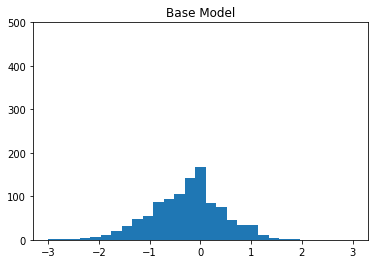

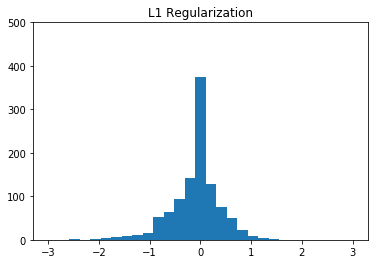

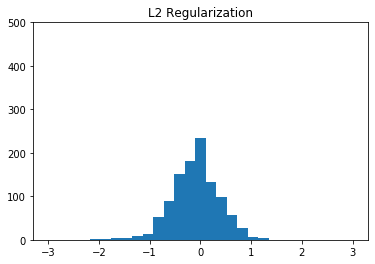

In [251]:
plt.figure()
_ = plt.hist(weights_base, bins=np.linspace(-3,3,30))
plt.title('Base Model')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l1, bins=np.linspace(-3,3,30))
plt.title('L1 Regularization')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l2, bins=np.linspace(-3,3,30))
plt.title('L2 Regularization')
_=plt.ylim([0,500])


In [219]:
a=[
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'
]
len(a)

16